<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.704483,28.465166,20.002092,-40.813899,54.357841,1673.888111,-1619.530270
1,0.0,1.0,59.428038,74.168628,88.607498,-2512.469089,-2280.264925,-1045.838917,-1234.426008
2,0.0,2.0,22.366686,65.241173,82.753151,-1520.406999,-1340.045989,-242.658222,-1097.387768
3,0.0,3.0,27.762156,46.942166,52.662598,-75.080764,62.286157,704.565123,-642.278966
4,0.0,4.0,21.016415,93.870711,92.223584,-9925.193927,-9708.083217,-755.016278,-8953.066939
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.144670,49.165115,73.425994,-514.661528,-293.925749,-257.413678,-36.512071
29996,999.0,26.0,32.800167,78.428206,91.001221,1645.075824,1857.305417,829.401484,1027.903934
29997,999.0,27.0,85.601139,49.853549,52.765476,1954.069927,2152.290091,-507.655549,2659.945640
29998,999.0,28.0,80.793296,66.246994,93.767197,-81.289265,169.518222,-64.453941,233.972163


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    36.704483  28.465166  20.002092   -40.813899    54.357841   
      1.0    59.428038  74.168628  88.607498 -2512.469089 -2280.264925   
      2.0    22.366686  65.241173  82.753151 -1520.406999 -1340.045989   
      3.0    27.762156  46.942166  52.662598   -75.080764    62.286157   
      4.0    21.016415  93.870711  92.223584 -9925.193927 -9708.083217   
...                ...        ...        ...          ...          ...   
999.0 25.0   88.144670  49.165115  73.425994  -514.661528  -293.925749   
      26.0   32.800167  78.428206  91.001221  1645.075824  1857.305417   
      27.0   85.601139  49.853549  52.765476  1954.069927  2152.290091   
      28.0   80.793296  66.246994  93.767197   -81.289265   169.518222   
      29.0   24.934721  64.471041  73.292051   875.566335  1048.264148   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    1673.888111 -1619.530270  
      1.0   -1045.838917 -1234.426008  
      2.0    -242.658222 -1097.387768  
      3.0     704.565123  -642.278966  
      4.0    -755.016278 -8953.066939  
...                  ...          ...  
999.0 25.0   -257.413678   -36.512071  
      26.0    829.401484  1027.903934  
      27.0   -507.655549  2659.945640  
      28.0    -64.453941   233.972163  
      29.0    982.491692    65.772457  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    36.704483  28.465166  20.002092   -40.813899    54.357841   
      1.0    59.428038  74.168628  88.607498 -2512.469089 -2280.264925   
      2.0    22.366686  65.241173  82.753151 -1520.406999 -1340.045989   
      3.0    27.762156  46.942166  52.662598   -75.080764    62.286157   
      4.0    21.016415  93.870711  92.223584 -9925.193927 -9708.083217   
...                ...        ...        ...          ...          ...   
999.0 25.0   88.144670  49.165115  73.425994  -514.661528  -293.925749   
      26.0   32.800167  78.428206  91.001221  1645.075824  1857.305417   
      27.0   85.601139  49.853549  52.765476  1954.069927  2152.290091   
      28.0   80.793296  66.246994  93.767197   -81.289265   169.518222   
      29.0   24.934721  64.471041  73.292051   875.566335  1048.264148   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    1673.888111 -1619.530270  
      1.0   -1045.838917 -1234.426008  
      2.0    -242.658222 -1097.387768  
      3.0     704.565123  -642.278966  
      4.0    -755.016278 -8953.066939  
...                  ...          ...  
999.0 25.0   -257.413678   -36.512071  
      26.0    829.401484  1027.903934  
      27.0   -507.655549  2659.945640  
      28.0    -64.453941   233.972163  
      29.0    982.491692    65.772457  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.704483,28.465166,20.002092,-40.813899,54.357841,1673.888111,-1619.530270
1,0.0,1.0,59.428038,74.168628,88.607498,-2512.469089,-2280.264925,-1045.838917,-1234.426008
2,0.0,2.0,22.366686,65.241173,82.753151,-1520.406999,-1340.045989,-242.658222,-1097.387768
3,0.0,3.0,27.762156,46.942166,52.662598,-75.080764,62.286157,704.565123,-642.278966
4,0.0,4.0,21.016415,93.870711,92.223584,-9925.193927,-9708.083217,-755.016278,-8953.066939
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.144670,49.165115,73.425994,-514.661528,-293.925749,-257.413678,-36.512071
29996,999.0,26.0,32.800167,78.428206,91.001221,1645.075824,1857.305417,829.401484,1027.903934
29997,999.0,27.0,85.601139,49.853549,52.765476,1954.069927,2152.290091,-507.655549,2659.945640
29998,999.0,28.0,80.793296,66.246994,93.767197,-81.289265,169.518222,-64.453941,233.972163


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    36.704483  28.465166  20.002092   -40.813899    54.357841   
      1.0    59.428038  74.168628  88.607498 -2512.469089 -2280.264925   
      2.0    22.366686  65.241173  82.753151 -1520.406999 -1340.045989   
      3.0    27.762156  46.942166  52.662598   -75.080764    62.286157   
      4.0    21.016415  93.870711  92.223584 -9925.193927 -9708.083217   
...                ...        ...        ...          ...          ...   
999.0 25.0   88.144670  49.165115  73.425994  -514.661528  -293.925749   
      26.0   32.800167  78.428206  91.001221  1645.075824  1857.305417   
      27.0   85.601139  49.853549  52.765476  1954.069927  2152.290091   
      28.0   80.793296  66.246994  93.767197   -81.289265   169.518222   
      29.0   24.934721  64.471041  73.292051   875.566335  1048.264148   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    1673.888111 -1619.530270  
      1.0   -1045.838917 -1234.426008  
      2.0    -242.658222 -1097.387768  
      3.0     704.565123  -642.278966  
      4.0    -755.016278 -8953.066939  
...                  ...          ...  
999.0 25.0   -257.413678   -36.512071  
      26.0    829.401484  1027.903934  
      27.0   -507.655549  2659.945640  
      28.0    -64.453941   233.972163  
      29.0    982.491692    65.772457  

[30000 rows x 7 columns]

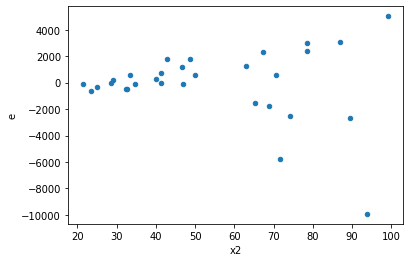

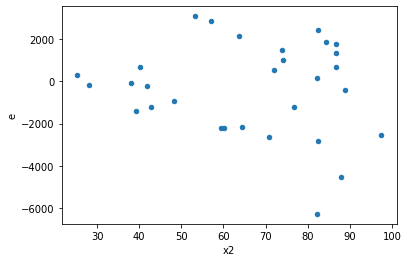

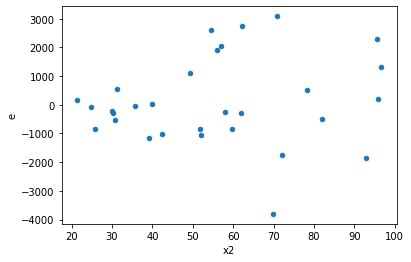

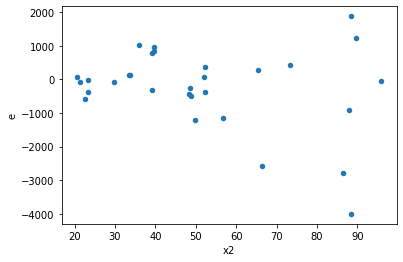

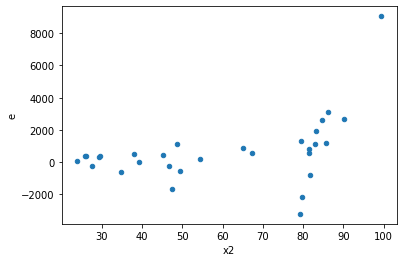

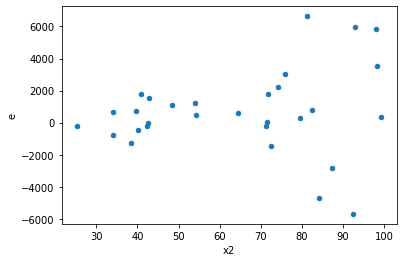

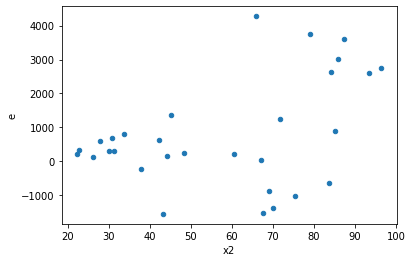

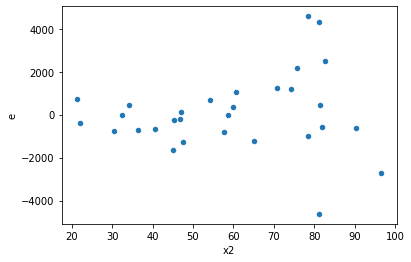

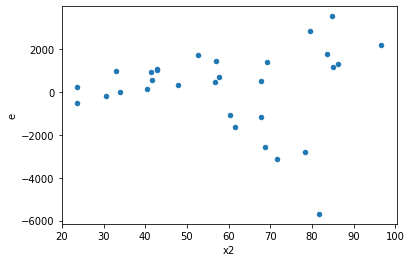

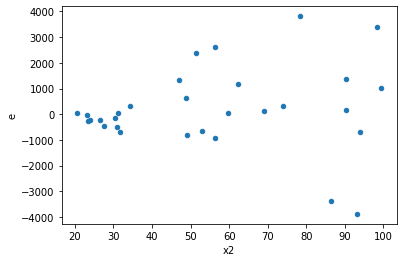

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,12.0,18655179.125187308,103399170.80364569,1554598.2604322757,8616597.566970473,5.542652263469354,0.0058659401310121595,0.9970670299344939,0.0029329700655060797,Reject001=0 : Heteroscedasticity
1.0,13.0,11.0,43908310.34871205,60591164.25583482,3377562.3345163115,5508287.659621347,1.6308470767010044,0.4230650909381708,0.7884674545309146,0.2115325454690854,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,20910214.611720722,16348851.553110283,1394014.3074480481,1816539.061456698,1.3030992951443552,0.7046249333483714,0.6476875333258143,0.3523124666741857,Reject001=1 : Homoscedasticity
4.0,12.0,12.0,5157947.196347603,54789485.64027649,429828.9330289669,4565790.470023041,10.622343260720758,0.0002559373842949686,0.9998720313078525,0.0001279686921474843,Reject001=0 : Heteroscedasticity
5.0,14.0,10.0,13706126.849294595,149262479.71396178,979009.0606638996,14926247.971396178,15.246281746641014,0.00013213978443027408,0.9999339301077849,6.606989221513704e-05,Reject001=0 : Heteroscedasticity
8.0,18.0,6.0,44204517.21853118,39431757.79054476,2455806.512140621,6571959.631757461,2.676090155827857,0.22765489245344983,0.8861725537732751,0.11382744622672492,Reject001=1 : Homoscedasticity
9.0,11.0,13.0,18561793.79174022,31131739.08134193,1687435.799249111,2394749.160103225,1.4191646053549771,0.5422596899129548,0.7288701550435226,0.2711298449564774,Reject001=1 : Homoscedasticity
13.0,12.0,12.0,25583537.044686988,67092723.576807275,2131961.420390582,5591060.298067273,2.6224960004402766,0.10826146885410193,0.945869265572949,0.054130734427050964,Reject001=1 : Homoscedasticity
16.0,13.0,11.0,11597639.472209796,46419148.49593881,892126.1132469074,4219922.590539891,4.730186156283908,0.014271529388272919,0.9928642353058635,0.007135764694136459,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,18655179.125187308,103399170.80364569,1554598.2604322757,8616597.566970473,5.542652263469354,0.0058659401310121595,Reject001=0 : Heteroscedasticity
1.0,13.0,11.0,43908310.34871205,60591164.25583482,3377562.3345163115,5508287.659621347,1.6308470767010044,0.4230650909381708,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,20910214.611720722,16348851.553110283,1394014.3074480481,1816539.061456698,1.3030992951443552,0.7046249333483714,Reject001=1 : Homoscedasticity
3.0,10.0,14.0,26947351.828243695,3805887.9720199346,2694735.1828243695,271849.14085856674,0.10088157923319199,0.000898384747026736,Reject001=0 : Heteroscedasticity
4.0,12.0,12.0,5157947.196347603,54789485.64027649,429828.9330289669,4565790.470023041,10.622343260720758,0.0002559373842949686,Reject001=0 : Heteroscedasticity
5.0,14.0,10.0,13706126.849294595,149262479.71396178,979009.0606638996,14926247.971396178,15.246281746641014,0.00013213978443027408,Reject001=0 : Heteroscedasticity
6.0,6.0,18.0,17984771.079390667,25736472.324417423,2997461.846565111,1429804.01802319,0.4770049098912298,0.3667468224166686,Reject001=1 : Homoscedasticity
7.0,13.0,11.0,54062225.85562889,31742348.659720317,4158632.7581252996,2885668.059974574,0.6938982660434353,0.5251550625003016,Reject001=1 : Homoscedasticity
8.0,18.0,6.0,44204517.21853118,39431757.79054476,2455806.512140621,6571959.631757461,2.676090155827857,0.22765489245344983,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      659
Reject001=0 : Heteroscedasticity    341
Name: Result_test, dtype: int64